# Исследование данных о продажах и оценках видеоигр

В данном проекте проводился анализ исторических данных о продажах игр, оценках пользователей и экспертов, жанрах игр и платформах, на которых эти игры выпускались. Целью данного проекта было выявить определяющие успешность игры закономерности, в частности, зависят ли объёмы продаж игры от оценок пользователей и критиков или от возрастного рейтинга игры. Результаты данного исследования позволят выстроить маркетинговую стратегию онлайн-магазина видеоигр на ближайшее будущее.

Для анализа доступен датасет, полученный из открытых источников данных. В датасете содержится информация по каждой игре: название, год выпуска, платформа выпуска, жанр игры, объёмы продаж в Северной Америке, Европе Японии и по остальному миру, оценки игры критиками и пользователями, возрастной рейтинг игры.

Работа над проектом состояла из следующих этапов:
1. [Изучение общей информации из датасетов, визуальный поиск ошибок в данных, поиск дубликатов;](#1)
2. [Изменение типов данных;](#2)
3. [Поиск и удаление пропусков в данных;](#3)
4. [Расчёт общего объёма продаж;](#4)
5. [Расчёт актуального периода анализа данных, подходящего под задачи проекта;](#5)
6. [Выделение наиболее популярных в актуальный период платформ;](#6)
7. [Изучение глобального объёма продаж для популярных платформ;](#7)
8. [Изучение влияния оценок пользователей и критиков на продажи игры;](#8)
9. [Изучение влияния жанров игр на продажи;](#9)
10. [Изучение предпочтений по регионам;](#10)
11. [Проверка гипотез;](#11)
12. [Общий вывод](#12)

<a id='1'></a>
### 1. Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import math
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
games = pd.read_csv('games.csv')
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Представленный для анализа датасет содержит информацию о каждой игре: название, год выпуска, платформа выпуска, жанр игры, объёмы продаж в Северной Америке, Европе Японии и по остальному миру, оценки игры критиками и пользователями, возрастной рейтинг игры. Первой проблемой, которую можно заметить в датасете являются заглавные буквы в названиях столбцов. Это неудобно для дальнейшего анализа, поэтому их нужно привести к нижнему регистру. Кроме того, в данных имеются пропуски. Для некоторых игр отсутсвуют название, год выпуска, жанр, оценки или рейтинг. Данные по объёму продаж представлены в полном объёме. Ряд данных представлен в некорректном формате. В частности, год выпуска, так же как и оценки критиков, представлен в дробном формате вместо целочисленного (оценки выставляются по стобалльной шкале, так что они должны быть целыми), а оценки пользователей представлены в категориальном формате вместо количественного.

In [3]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.duplicated().sum()

0

Так как дубликатов в датасете не обнаружено, то можно переходить к исправлению ошибок в данных

<a id='2'></a>
### 2. Изменение типов данных

In [5]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


In [6]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
games['user_score'].replace('tbd', np.nan, inplace=True)
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Так как столбец с оценками пользователей у нас представлен в формате 'object', то необходимо было проверить данный столбец на наличие строковых значений, записанных словами или буквами. Кроме числовых значений и значения nan в столбце также имелось значение 'tbd'. Это означает, что пользовательский рейтинг игры ещё не определён, а значит данных по пользовательскому рейтингу на момент анализа нет. Исходя из этой логики значения 'tbd' было изменено на nan. Заменить данные значения на 0 не представляется возможным, так как 0 - это вполне конкретная оценка игры, а в данном случае данных просто нет. 

In [8]:
games['user_score'] = pd.to_numeric(games['user_score']).astype('float64')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


После изменения типов данных все данные в таблице приведены к корректому формату. Данные по пользовательским оценкам приведены в дробный формат, так как оценки выставлялись по десятибалльной шкале и при расчёте среднего округлялись до десятых.

<a id='3'></a>
### 3. Поиск и удаление пропусков в данных

In [9]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [10]:
names_nan = games[games['name'].isna()]
names_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Так как название и жанр отсутствуют только у двух игр, то оказалось возможным найти и проверить данные строчки. Название и жанр отсутствуют у одних и тех же игр. Кроме того, продажи данных игр оказались ничтожно малыми, а оценки и рейтинг игр так же отсутствуют. Так как строк мало и большого влияния на анализ они не оказывают, то целесообразно их просто удалить

In [11]:
games.dropna(subset=['name'], inplace=True)
games.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Заполнить пропуски в информации по году выпуска игр, так же как и в информации по оценкам критиков и игроков не представляется возможным, так как информации для поиска закономерностей и определения наивероятнейшего пропущенного значения недостаточно. Единственный показатель, пропуски в котором можно попробовать заполнить - это возрастной рейтинг игр, так как он может зависить от жанра игры.

In [12]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [13]:
genre_pivot = games.pivot_table(index=['genre', 'rating'], values='name', aggfunc='count').reset_index()
display(genre_pivot)

,genre,rating,name
0,Action,AO,1
1,Action,E,416
2,Action,E10+,481
3,Action,EC,1
4,Action,M,608
5,Action,T,681
6,Adventure,E,162
7,Adventure,E10+,68
8,Adventure,EC,2
9,Adventure,M,99


In [14]:
games['rating'].fillna('No', inplace=True)
games.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

Так как практически во всех жанрах игр представлены почти все возрастные рейтинги, и установить однозначно вероятный рейтинг по жанру невозможно, то пропуски не были заполнены. Таким образом, все пропущенные значения были оставлены в таблице. 

In [15]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000
mean,2006.486256,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046
std,5.875525,0.813565,0.503359,0.308871,0.186742,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Ошибок в виде аномально боьлших или аномально малых значений в таблице не имеется. Первые игры действительно могли появиться в 1980 году, а нулевые значения в информации об объёме продаж говорят только о том, что в данном регионе данная игра просто не продавалась. Однако, так как игра могла продаваться в других регионах, то исключать такие значения нельзя. Нулевые значения в оценке пользователей так же являются вполне возможными. Таким образом, все ошибки, мешающие дальнейшему анализу данных были исправлены

<a id='4'></a>
### 4. Расчёт общего объёма продаж

In [16]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,No,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,No,31.38


<a id='5'></a>
### 5. Расчёт актуального периода анализа данных, подходящего под задачи проекта

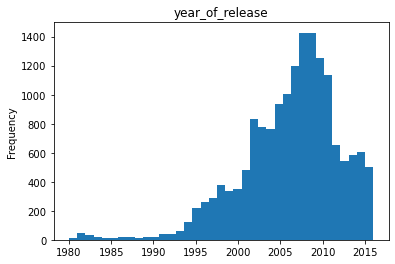

In [17]:
games['year_of_release'].plot(kind='hist', bins=games['year_of_release'].nunique(), title = 'year_of_release')
plt.show()

Как видно из гистограммы, до 1996 года игр выпускалось мало и анализировать более ранние данные смысла не имеет, так как факторы успеха игры при не очень большом предложении на рынке сильно отличаются от текущей ситуации. В целом же, начиная с 1995 года начинается стабильный рост количества игр, выпускаемых ежегодно. Пик количества новых игр на рынке приходится на 2009 год

<AxesSubplot:xlabel='platform'>

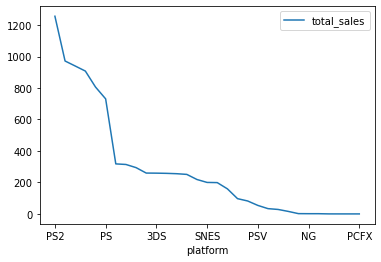

In [18]:
platforms = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platforms.plot()

In [19]:
top_platforms = platforms.loc[platforms['total_sales'] > 300]
top_platforms['top_platforms'] = True
top_platforms

,total_sales,top_platforms
platform,,
PS2,1255.77,True
X360,971.42,True
PS3,939.65,True
Wii,907.51,True
DS,806.12,True
PS,730.86,True
GBA,317.85,True
PS4,314.14,True


Для определения актуального периода, данные по которому имеет смысл анализировать, необходимо выяснить средний срок жизни игровой платформы (от появления до почти полной потери популярности). Это позволит понять, данные по каким платформам стоит анализировать. Так как анализировать стоит только самые популярные платформы, необходимо определить границу между популярными и не очень популярными платформами. Как видно из графика, резкое изменение происходит на уровне 300 млн. проданных игр. Поэтому для дальнейшего анализа были оставлены только 8 платформ с продажами выше 300 млн.

In [20]:
games_wide = games.merge(top_platforms, on='platform', how='outer')
games_wide.rename(columns={'total_sales_x': 'total_sales_game', 'total_sales_y': 'total_sales_platform'})
games_wide.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_x,total_sales_y,top_platforms
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,907.51,True
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52,907.51,True
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77,907.51,True
3,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91,907.51,True
4,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32,907.51,True


In [21]:
top_platforms_all = games_wide.query('top_platforms == True')
top_platforms_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10636 entries, 0 to 11909
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10636 non-null  object 
 1   platform         10636 non-null  object 
 2   year_of_release  10465 non-null  Int64  
 3   genre            10636 non-null  object 
 4   na_sales         10636 non-null  float64
 5   eu_sales         10636 non-null  float64
 6   jp_sales         10636 non-null  float64
 7   other_sales      10636 non-null  float64
 8   critic_score     5226 non-null   Int64  
 9   user_score       4834 non-null   float64
 10  rating           10636 non-null  object 
 11  total_sales_x    10636 non-null  float64
 12  total_sales_y    10636 non-null  float64
 13  top_platforms    10636 non-null  object 
dtypes: Int64(2), float64(7), object(5)
memory usage: 1.2+ MB


<AxesSubplot:xlabel='year_of_release'>

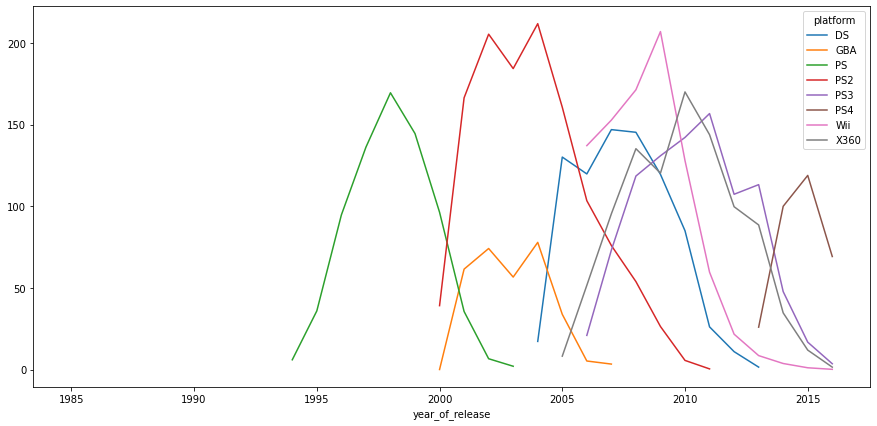

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
top_platforms_all.groupby(['year_of_release', 'platform'])['total_sales_x'].sum().unstack().plot(ax=ax)

Как видно из графиков, средний срок существования платформы от появления до утраты популярности составляет 9 лет. За этот период новую платформу успевает купить достаточное количество человек, но системные требования новых игр не успевают превысить возможности платформы. Так как нам необходимо получить данные, которые помогут сделать прогноз на 2017 год, а данные за 2016 год не полные, то логично взять период в 9 лет от 2006 года включительно. Однако, в период после 2006 года укладывается две фазы развития рынка видеоигр: пик в 2008-2009 годах и дальнейший спад продаж, вызванный тем, что значительное количество пользователей ушли в браузерные и мобильные онлайн-игры, не требующие какой-либо конкретной платформы. Так как 2017 год относится к фазе спада, то логичнее рассматривать только эту фазу. Поэтому для дальнейшего анализа используются данные только после 2009 года

In [23]:
actual_time = games.loc[games['year_of_release'] >= 2010]

<a id='6'></a>
### 6. Выделение наиболее популярных в актуальный период платформ

<AxesSubplot:xlabel='year_of_release'>

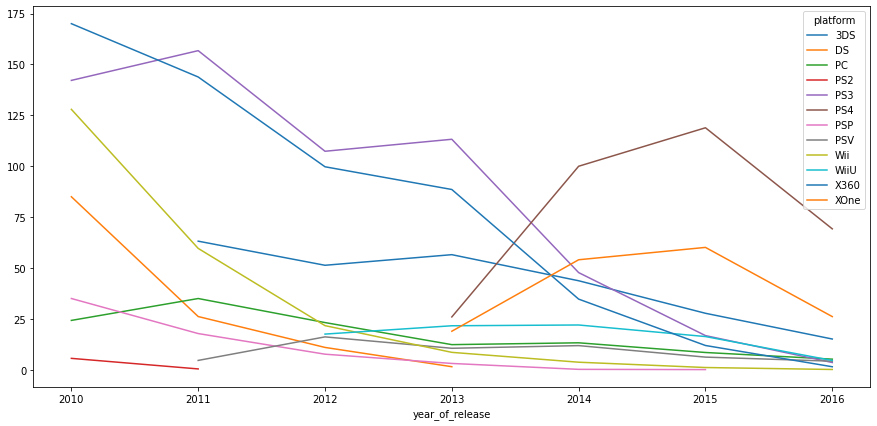

In [24]:
fig, ax = plt.subplots(figsize=(15,7))
actual_time.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().plot(ax=ax)

In [25]:
top_actual_time = actual_time.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
top_actual_time

,total_sales
platform,
PS3,587.74
X360,550.41
PS4,314.14
3DS,257.81
Wii,222.97
XOne,159.32
DS,123.75
PC,121.96
WiiU,82.19


Как видно из графиков и таблицы, наиболее популярными платформами в период с 2006 года являются Xbox 360, PS3 и Wii, продавшие более 700 млн. игр каждая. Дальнейший анализ закономерностей стоит проводить основываясь на данных по этим платформам. Также стоит отметить платформы PS4 и Xbox One, так как только эти две платформы показывают тенденцию к росту. Снижение на графике в 2016 году объясняется неполными данными за 2016 год. В дальнейшем анализе эти платформы не учитываются, так как по ним ещё мало данных (появились только в 2013 году), и они не успели стать популярными. Однако именно на них стоит обратить внимание при выстраивании маркетинговой стратегии, как на наиболее перспективных платформах, так как популярность всех остальных платформ падает и количество продаваемых игр для этих платформ стремится к нулю.

In [26]:
x_360 = actual_time.query('platform == "X360"')
x_360.info()
x_360.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 14 to 16654
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             680 non-null    object 
 1   platform         680 non-null    object 
 2   year_of_release  680 non-null    Int64  
 3   genre            680 non-null    object 
 4   na_sales         680 non-null    float64
 5   eu_sales         680 non-null    float64
 6   jp_sales         680 non-null    float64
 7   other_sales      680 non-null    float64
 8   critic_score     432 non-null    Int64  
 9   user_score       495 non-null    float64
 10  rating           680 non-null    object 
 11  total_sales      680 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 70.4+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68


In [27]:
ps3 = actual_time.query('platform == "PS3"')
ps3.info()
ps3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             889 non-null    object 
 1   platform         889 non-null    object 
 2   year_of_release  889 non-null    Int64  
 3   genre            889 non-null    object 
 4   na_sales         889 non-null    float64
 5   eu_sales         889 non-null    float64
 6   jp_sales         889 non-null    float64
 7   other_sales      889 non-null    float64
 8   critic_score     475 non-null    Int64  
 9   user_score       539 non-null    float64
 10  rating           889 non-null    object 
 11  total_sales      889 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 92.0+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84,7.5,E,10.70


In [28]:
wii = actual_time.query('platform == "Wii"')
wii.info()
wii.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 61 to 16626
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             450 non-null    object 
 1   platform         450 non-null    object 
 2   year_of_release  450 non-null    Int64  
 3   genre            450 non-null    object 
 4   na_sales         450 non-null    float64
 5   eu_sales         450 non-null    float64
 6   jp_sales         450 non-null    float64
 7   other_sales      450 non-null    float64
 8   critic_score     125 non-null    Int64  
 9   user_score       122 non-null    float64
 10  rating           450 non-null    object 
 11  total_sales      450 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 46.6+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
61,Just Dance 3,Wii,2011,Misc,5.95,3.11,0.00,1.06,74,7.8,E10+,10.12
68,Just Dance 2,Wii,2010,Misc,5.80,2.85,0.01,0.78,74,7.3,E10+,9.44
79,Wii Party,Wii,2010,Misc,1.75,3.47,2.49,0.67,68,7.4,E,8.38
97,Super Mario Galaxy 2,Wii,2010,Platform,3.56,2.35,0.98,0.62,97,9.1,E,7.51
116,Just Dance 4,Wii,2012,Misc,4.05,2.16,0.00,0.55,74,7.3,E10+,6.76


In [29]:
x_one = actual_time.query('platform == "XOne"')
x_one.info()
x_one.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    Int64  
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     169 non-null    Int64  
 9   user_score       182 non-null    float64
 10  rating           247 non-null    object 
 11  total_sales      247 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 25.6+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,No,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22


In [30]:
ps4 = actual_time.query('platform == "PS4"')
ps4.info()
ps4.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    Int64  
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    Int64  
 9   user_score       257 non-null    float64
 10  rating           392 non-null    object 
 11  total_sales      392 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 40.6+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,No,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,No,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66


In [31]:
others = actual_time.query('platform != "PS3" and platform != "Wii" and platform != "X360" and platform != "XOne" and platform != "PS4"')
others.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,<NA>,NaN,No,15.13
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,No,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85,8.2,E,12.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,No,11.68
53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90,8.4,E,10.81


Для дальнейшего анализа были сделаны срезы данных по трем наиболее популярным платформам и отдельно по всем остальным платформам.

<a id='7'></a>
### 7. Изучение глобального объёма продаж для популярных платформ

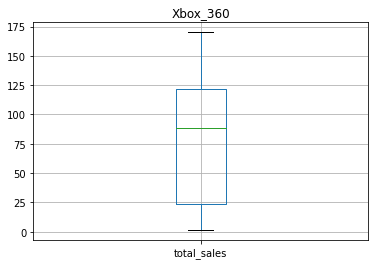

In [32]:
x_360_sales = x_360.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
x_360_sales.boxplot('total_sales')
plt.title('Xbox_360')
plt.show()

In [33]:
x_360_sales['total_sales'].describe()

count      7.000000
mean      78.630000
std       65.151249
min        1.520000
25%       23.350000
50%       88.580000
75%      121.790000
max      170.030000
Name: total_sales, dtype: float64

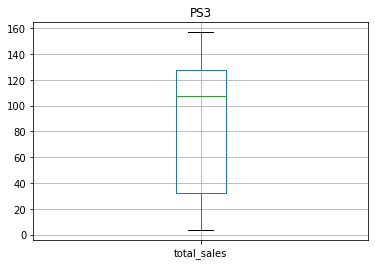

In [34]:
ps3_sales = ps3.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
ps3_sales.boxplot('total_sales')
plt.title('PS3')
plt.show()

In [35]:
ps3_sales['total_sales'].describe()

count      7.000000
mean      83.962857
std       61.063587
min        3.600000
25%       32.290000
50%      107.360000
75%      127.710000
max      156.780000
Name: total_sales, dtype: float64

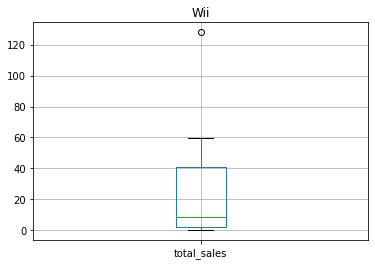

In [36]:
wii_sales = wii.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
wii_sales.boxplot('total_sales')
plt.title('Wii')
plt.show()

In [37]:
wii_sales['total_sales'].describe()

count      7.000000
mean      31.852857
std       47.236286
min        0.180000
25%        2.445000
50%        8.590000
75%       40.680000
max      127.950000
Name: total_sales, dtype: float64

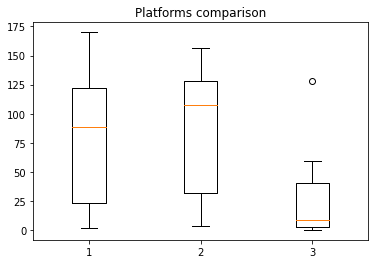

In [38]:
plt.boxplot([x_360_sales['total_sales'], ps3_sales['total_sales'], wii_sales['total_sales']])
plt.title('Platforms comparison')
plt.show()

<font color='blue'>На диаграмме 1 - Xbox 360, 2 - PS3, 3 - Wii</font>

Как видно из диаграмм и таблиц, распределение по всем популярным платформам смещённое. При том, что общие (953М у X360, 931М у PS3 и 891M у Wii) и средние продажи отличаются не так сильно, распределение сильно отличается. По диаграммам видно, что распределение у Xbox 360 и PS3 смещено вправо, а у Wii - влево. Это говорит о том, что у Wii наибольший вклад в популярность вносит относительно короткий период пиковой популярности, после которого произошёл достаточно быстрый спад продаж. Это может объясняться наличием небольшого количества очень успешных проектов при слабой популярности остальных проектов. Поэтому нельзя сказать однозначно в чём причина популярности - успехе платформы или успехе конкретных продуктов. У Xbox 360 и PS3 ситуация обратная - высокий уровень продаж распределён равномернее и успех значительно стабильнее. Особенно ярко это выражено у PS3. Такое распределение говорит об общем хорошем уровне платформы, на которой каждый год появляются боле-менее удачные продукты. Кроме того, такое положение дел может объясняться тем, что на Wii лучше идут определенные жанры игр (Action и Sports), тогда как платформы Xbox и PS3 являются более универсальными платформами. Именно поэтому при значительном успехе отдельных продуктов,  сама платформа Wii оказалась менее успешной, что и объясняет такой сильный перекос вправо

<a id='8'></a>
### 8. Изучение влияния оценок пользователей и критиков на продажи игры

In [39]:
x_360_corr = x_360[['total_sales', 'critic_score', 'user_score']]
x_360_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.340064,0.066035
critic_score,0.340064,1.000000,0.597552
user_score,0.066035,0.597552,1.000000


In [40]:
ps3_corr = ps3[['total_sales', 'critic_score', 'user_score']]
ps3_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.400594,0.065092
critic_score,0.400594,1.000000,0.595259
user_score,0.065092,0.595259,1.000000


In [41]:
wii_corr = wii[['total_sales', 'critic_score', 'user_score']]
wii_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.310588,0.147160
critic_score,0.310588,1.000000,0.471698
user_score,0.147160,0.471698,1.000000


In [42]:
x_one_corr = x_one[['total_sales', 'critic_score', 'user_score']]
x_one_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


In [43]:
ps4_corr = ps4[['total_sales', 'critic_score', 'user_score']]
ps4_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


In [44]:
others_corr = others[['total_sales', 'critic_score', 'user_score']]
others_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.242645,0.138624
critic_score,0.242645,1.000000,0.528952
user_score,0.138624,0.528952,1.000000


Как видно из таблиц корреляции, продажи игр на топовых платформах зависят от оценок критиков, хоть и не очень сильно. Зависимость во всех случаях прямая - чем лучше оценки, тем лучше продажи, что логично, так как пользователи стремятся покупать качественный продукт. Более того, у более стабильных платформ (Xbox 360 и PS3) эта зависимость выше, чем у менее стабильной платформы Wii. В целом зависимость от оценок критиков имеется и в общем случае. Относительно невысокий коэффициент корреляции объясняется тем, что большинство игр приобретается в первые недели продаж, когда оценок и обзоров критиков ещё нет или очень мало. Кроме того, значительная часть игроков покупает игры по советам друзей и знакомых, а не по отзывам критиков. 

Ещё меньше продажи зависят от оценок других игроков, однако закономерности здесь примерно те же, что и для оценок критиков. Это говорит о большем доверии к мнению критиков, чем к мнению игроков. В целом же, можно говорить, что зависимость от оценок игроков проявляется только для топовых платформ и практически отсутствует в общем случае. Для молодых платформ (Xbox One и PS4) продажи никак не зависят от оценок игроков, так как платформы ещё только начали развитие и оценок игроков ещё мало. Кроме того, данные платформы являются новыми поколениями уже известных и хорошо себя зарекомендовавших платформ, поэтому оценки пользователей не имеют особого значения

<a id='9'></a>
### 9. Изучение влияния жанров игр на продажи

In [45]:
genre = actual_time.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre

,total_sales
genre,
Action,673.09
Shooter,479.74
Sports,328.39
Role-Playing,315.28
Misc,234.56
Racing,122.68
Platform,119.72
Fighting,81.59
Simulation,71.75


<AxesSubplot:xlabel='genre'>

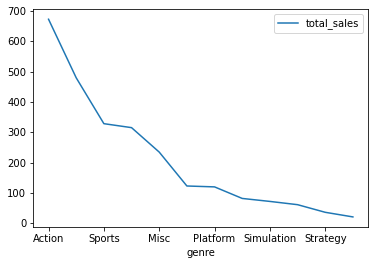

In [46]:
genre.plot()

Самыми прибыльными жанрами игр являются Action, Sports и Shooter. Это жанры, игры в которых не требуют больших затрат по времени, просты в управлении и не требуют больших интеллектуальных усилий. Это логично, так как большинство игроков используют игры для отдыха и не хотят сильно напрягаться за игрой и тратить на неё много времени. Исходя из графика, можно разделить жанры на прибыльные (больше 700М), средние (около 500М) и неприбыльные (меньше 300М). К самым неприбыльным жанрам (менее 100М) относятся Puzzle и Strategy, являющиеся противоположными по механике игры к самым прибыльным жанрам

<a id='10'></a>
### 10. Изучение предпочтений по регионам

In [47]:
top_platforms_na = actual_time.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
top_platforms_na

,na_sales
platform,
X360,334.18
PS3,229.25
Wii,121.20
PS4,108.74
XOne,93.12
3DS,82.65
DS,59.66
PC,39.07
WiiU,38.10


<AxesSubplot:xlabel='platform'>

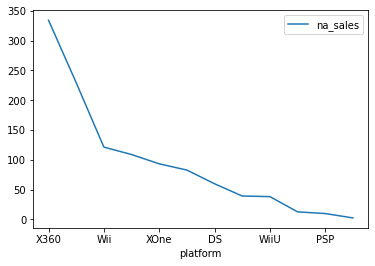

In [48]:
top_platforms_na.plot()

In [49]:
top_genres_na = actual_time.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
top_genres_na

,na_sales
genre,
Action,290.64
Shooter,237.47
Sports,156.81
Misc,123.80
Role-Playing,112.05
Platform,54.90
Racing,46.11
Fighting,39.05
Simulation,26.39


<AxesSubplot:xlabel='genre'>

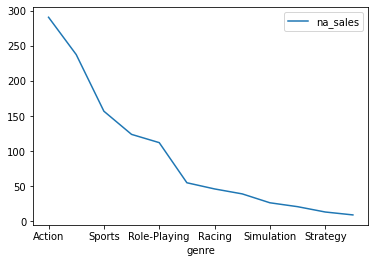

In [50]:
top_genres_na.plot()

In [51]:
na_rating = actual_time.pivot_table(index='rating', values='na_sales', aggfunc='sum').reset_index()
na_rating.sort_values(by='na_sales', ascending=False)

,rating,na_sales
3,M,382.22
0,E,271.15
6,T,160.81
1,E10+,159.38
4,No,155.72
2,EC,1.13
5,RP,0.00


Наиболее популярными жанрами среди пользователей из Северной Америки являются те же Action, Sports и Shooter, что и в целом по миру. Наиболее популярными платформами являются Xbox 360, PS3 и Wii. Стоит отметить необычно высокую долю Wii. В Северной Америке данная платформа является более популярной, чем в целом по миру. Возрастной рейтинг оказывает достаточно сильное влияние на продажи игр. Одним из лидеров по продажам являются игры с рейтингом E, что логично так как это универсальные игры, которые подходят всем. Однако самыми популярными являются игры с рейтингом М, то есть игры для молодых людей старше 17 лет. Это можно объяснить тем, что основные потребители видеоигр - подростки и молодые люди от 11 лет, но игры для взрослых кажутся подросткам более интересными, а следовательно они становятся более популярными. Кроме того, большая часть игр популярного жанра Shooter содержат большое количество сцен насилия, что позволяет отнести их к рейтингу М

In [52]:
top_platforms_eu = actual_time.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
top_platforms_eu

,eu_sales
platform,
PS3,213.60
X360,163.41
PS4,141.09
PC,68.82
Wii,65.91
3DS,61.27
XOne,51.59
DS,28.06
WiiU,25.13


<AxesSubplot:xlabel='platform'>

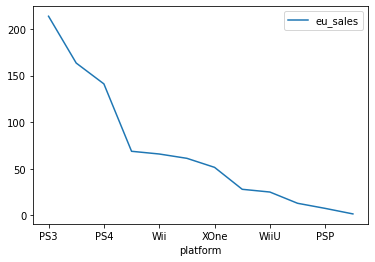

In [53]:
top_platforms_eu.plot()

In [54]:
top_genres_eu = actual_time.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
top_genres_eu

,eu_sales
genre,
Action,233.63
Shooter,171.45
Sports,116.84
Role-Playing,75.48
Misc,66.09
Racing,54.75
Platform,38.30
Simulation,26.39
Fighting,20.33


<AxesSubplot:xlabel='genre'>

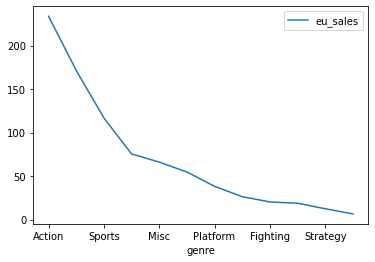

In [55]:
top_genres_eu.plot()

In [56]:
eu_rating = actual_time.pivot_table(index='rating', values='eu_sales', aggfunc='sum').reset_index()
eu_rating.sort_values(by='eu_sales', ascending=False)

,rating,eu_sales
3,M,292.04
0,E,197.34
4,No,139.44
6,T,113.08
1,E10+,99.28
5,RP,0.03
2,EC,0.00


Распределение по жанрам игр и возрастному рейтингу для Европы примерно такое же как для Северной Америки и в целом по миру. Однако распределение по платформам несколько отличается. Самой популярной платформой для ЕС является PS3, а не Xbox 360. Так же в ЕС одним из лидеров среди платформ является PS4. В распределении по возрастному рейтингу большую роль играют игры без рейтинга. Это связано с тем, что система ESRB является американской и в Европе распространена сильно меньше, поэтому значительная часть игр, выпускаемых для европейского рынка может просто не проходить оценку и не получать рейтинг

In [57]:
top_platforms_jp = actual_time.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
top_platforms_jp

,jp_sales
platform,
3DS,100.62
PS3,59.26
PSP,42.20
DS,27.90
PSV,21.84
Wii,17.75
PS4,15.96
WiiU,13.01
X360,5.46


<AxesSubplot:xlabel='platform'>

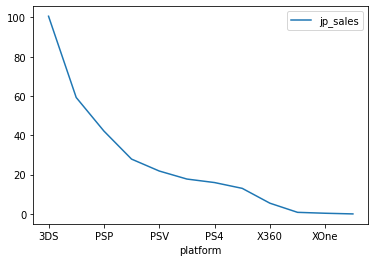

In [58]:
top_platforms_jp.plot()

In [59]:
top_genres_jp = actual_time.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
top_genres_jp

,jp_sales
genre,
Role-Playing,103.54
Action,72.20
Misc,24.29
Platform,15.81
Adventure,15.67
Sports,15.51
Shooter,14.04
Fighting,13.90
Simulation,13.30


<AxesSubplot:xlabel='genre'>

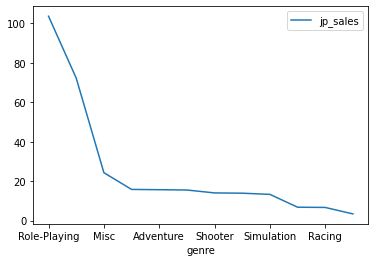

In [60]:
top_genres_jp.plot()

In [61]:
jp_rating = actual_time.pivot_table(index='rating', values='jp_sales', aggfunc='sum').reset_index()
jp_rating.sort_values(by='jp_sales', ascending=False)

,rating,jp_sales
4,No,171.49
0,E,47.87
6,T,42.11
3,M,30.45
1,E10+,13.22
2,EC,0.00
5,RP,0.00


Распределение по игровым платформам и по жанрам для Японии сильно отличается от ЕС и Северной Америки. Наиболее популярными платформами в Японии являются 3DS и PS3, в то время как Wii и Xbox 360 не входят в список самых популярных платформ. Вероятнее всего, это объясняется тем, что платформа 3DS лучше приспособлена для игр жанра РПГ, который является самым популярным в Японии (Action только на втором месте, а Sports только в середине рейтинга). Популярностью РПГ игр также объяснятся более высокий уровень продаж игр с рейтингом Т, чем с рейтингом М, так как большинство игр жанра РПГ имеют рейтинг Т. Однако больше всего продается игр без возрастного рейтинга. Из-за жанровой специфики рынка (значительное преобладание РПГ над всеми другими жанрами)значительная часть продаваемых игр выпускается именно для Японии и не проходит возрастную оценку, так как эти игры, скорее всего вообще не поставляются на американский рынок.

<a id='11'></a>
### 11. Проверка гипотез

In [62]:
x_one.dropna(subset=['user_score'], inplace=True)
x_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 165 to 16660
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             182 non-null    object 
 1   platform         182 non-null    object 
 2   year_of_release  182 non-null    Int64  
 3   genre            182 non-null    object 
 4   na_sales         182 non-null    float64
 5   eu_sales         182 non-null    float64
 6   jp_sales         182 non-null    float64
 7   other_sales      182 non-null    float64
 8   critic_score     165 non-null    Int64  
 9   user_score       182 non-null    float64
 10  rating           182 non-null    object 
 11  total_sales      182 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 18.8+ KB


In [63]:
pc = actual_time.query('platform == "PC"')
pc.dropna(subset=['user_score'], inplace=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 192 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             374 non-null    object 
 1   platform         374 non-null    object 
 2   year_of_release  374 non-null    Int64  
 3   genre            374 non-null    object 
 4   na_sales         374 non-null    float64
 5   eu_sales         374 non-null    float64
 6   jp_sales         374 non-null    float64
 7   other_sales      374 non-null    float64
 8   critic_score     348 non-null    Int64  
 9   user_score       374 non-null    float64
 10  rating           374 non-null    object 
 11  total_sales      374 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 38.7+ KB


In [64]:
np.var(x_one['user_score']) / np.var(pc['user_score'])

0.7760233555381888

In [65]:
alpha = .05
results_platforms = st.ttest_ind(
            x_one['user_score'],
            pc['user_score'],
            equal_var=False)
print('p-значение:', results_platforms.pvalue)
if (results_platforms.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('Средняя пользовательские рейтинги для Xbox One:', x_one['user_score'].mean())
print('Средняя пользовательские рейтинги для PC:', pc['user_score'].mean())

p-значение: 0.9801634129117883
Не получилось отвергнуть нулевую гипотезу
Средняя пользовательские рейтинги для Xbox One: 6.52142857142857
Средняя пользовательские рейтинги для PC: 6.518181818181822


Для проверки гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, были сделаны срезы данных по этим платформам. Так как проверялась гипотеза о равенстве средних значений в двух выборках, то использовался t-критерий Стьюдента. Для начала была сформулирована нулевая гипотеза. Так как обычно нулевая гипотеза строится на отсутствии статистически значимых различий между выборками, то нулевая гипотеза звучит так: Статистически значимых различий между рейтингами платформ Xbox One и PC нет. Альтернативная гипотеза сформулирована так: Рейтинги платформ Xbox One и PC статистически отличаются. Так как дисперсии этих выборок отличаются более, чем на 5%, то в тесте показателю equal_var было присвоено значение False. Порог значимости был выбран в 0.05. Так как p-значение оказалось значительно меньше порога значимости, то можно сказать, что получить имеющиеся результаты при нулевой гипотезе маловероятно. Следовательно, нулевая гипотеза была отвергнута. Это говорит о том, что между выборками имеются различия, а значит рейтинги платформ Xbox One и PC разные. Рассчитаные показатели средних оценок пользователей это подтверждают, так как средняя пользовательская оценка для PC составляет 6.83, что значительно выше средней оценки для Xbox One

In [66]:
action = actual_time.query('genre == "Action"')
action.dropna(subset=['user_score'], inplace=True)
action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             779 non-null    object 
 1   platform         779 non-null    object 
 2   year_of_release  779 non-null    Int64  
 3   genre            779 non-null    object 
 4   na_sales         779 non-null    float64
 5   eu_sales         779 non-null    float64
 6   jp_sales         779 non-null    float64
 7   other_sales      779 non-null    float64
 8   critic_score     675 non-null    Int64  
 9   user_score       779 non-null    float64
 10  rating           779 non-null    object 
 11  total_sales      779 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 80.6+ KB


In [67]:
sports = actual_time.query('genre == "Sports"')
sports.dropna(subset=['user_score'], inplace=True)
sports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 77 to 16643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             315 non-null    object 
 1   platform         315 non-null    object 
 2   year_of_release  315 non-null    Int64  
 3   genre            315 non-null    object 
 4   na_sales         315 non-null    float64
 5   eu_sales         315 non-null    float64
 6   jp_sales         315 non-null    float64
 7   other_sales      315 non-null    float64
 8   critic_score     242 non-null    Int64  
 9   user_score       315 non-null    float64
 10  rating           315 non-null    object 
 11  total_sales      315 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 32.6+ KB


In [68]:
np.var(action['user_score']) / np.var(sports['user_score'])

0.6537010305966994

In [69]:
alpha = .05
results_genres = st.ttest_ind(
            action['user_score'],
            sports['user_score'],
            equal_var=False)
print('p-значение:', results_genres.pvalue)
if (results_genres.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('Средняя пользовательские рейтинги для жанра Action:', action['user_score'].mean())
print('Средняя пользовательские рейтинги для жанра Sports:', sports['user_score'].mean())

p-значение: 1.4516152467844418e-15
Отвергаем нулевую гипотезу
Средняя пользовательские рейтинги для жанра Action: 6.781899871630309
Средняя пользовательские рейтинги для жанра Sports: 5.901587301587301


Для проверки гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные, были так же сделаны срезы данных по этим жанрам. Нулевые гипотезы были сформулированы аналогичным образом, как и в предыдущем случае. Так как дисперсии выборок так же отличаются более чем на 5%, то параметру equal_var так же было присвоено значение False. Так как p-значение в данном случае так же оказалось значительно ниже порога значимости, то нулевая гипотеза так же была отвергнута. Это означает, что выборки отличаются, и средние пользовательские рейтинги жанров Action и Sports разные. Это подтверждается рассчитанными значениями пользовательских оценок для данных жанров. Средние оценки для жанра Action выше, чем для жанра Sports

<a id='12'></a>
### 12. Общий вывод

В данном проекте проводился анализ исторических данных о продажах игр, оценках пользователей и экспертов, жанрах игр и платформах, на которых эти игры выпускались. Целью данного проекта было выявить определяющие успешность игры закономерности, в частности, зависят ли объёмы продаж игры от оценок пользователей и критиков или от возрастного рейтинга игры.

После проведенного первичного визуального анализа данных серьёзных проблем с данными выявлено не было. Заголовки столбцов были приведены к нижнему регистру, в столбцах, где это требовалось, данные были приведены к корректному типу. В частности данные по году выпуска и оценкам критиков были переведены из дробного в целочисленный формат, так как год не может быть дробным, а оценки критиков выставлялись по стобалльной шкале, с округлением при расчёте среднего значения до целых. В столбце с оценками пользователей были обнаружены значения 'tbd', которые означают, что оценки ещё не выставлены и будут рассчитаны позже. Так как на момент анализа оценок нет, то данные значения были заменены на nan, после чего значения столбца были переведены из формата object в формат float, так оценки пользователей выставлялись по десятибалльной шкале с округлением до десятых.

Кроме некорректного типа данных в некоторых столбцах, в датасете также имелись пропущенные значения. Строки, в которых отсутствовала какая-либо информация об игре были удалены. Остальные пропуски не были заполнены, так как для их заполнения недостаточно информации. После предварительной обработки данных были рассчитаны и добавлены в таблицу данные по общим продажам игр.

После проведенного анализа можно сделать следующие выводы:
1. Рост продаж и популярности видеоигр начинается только с 1995 года, а пик продаж приходится на 2009 год. До 1995 года игр выпускалось мало;
2. Средний срок жизни игровой платформы составляет 9 лет. За этот период новую платформу успевает купить достаточное количество человек, но системные требования новых игр не успевают превысить возможности платформы;
3. Наиболее популярными платформами в период с 2006 по 2016 годы являются Xbox 360, PS3 и Wii, продавшие более 700 млн. игр каждая. Наиболее перспективными однако являются платформы PS4 и Xbox One, так как только они показывали устойчивую тенденцию к росту в предшествующие два года. Продажи игр на остальных платформах устойчиво падают;
4. Наибольший вклад в популярность платформы Wii вносит относительно короткий период пиковой популярности, после которого произошёл достаточно быстрый спад продаж. Это может объясняться наличием небольшого количества очень успешных проектов при слабой популярности всей платформы. Данные же по Xbox 360 и PS3 указывают на общтй хороший уровень платформ, на которых каждый год появляются боле-менее удачные продукты;
5. Продажи игр на топовых платформах зависят от оценок критиков, хоть и не очень сильно. Зависимость во всех случаях прямая - чем лучше оценки, тем лучше продажи, так как пользователи стремятся покупать качественный продукт. Относительно невысокий коэффициент корреляции объясняется тем, что большинство игр приобретается в первые недели продаж, когда оценок и обзоров критиков ещё нет или очень мало. Зависимость продаж от оценок пользователей проявляется только для топовых платформ;
6. Самыми прибыльными жанрами игр являются Action, Sports и Shooter, так как большинство игроков используют игры для отдыха и не хотят сильно напрягаться за игрой и тратить на неё много времени;
7. Наиболее популярными жанрами среди пользователей из Северной Америки являются Action, Sports и Shooter, наиболее популярными платформами - Xbox 360, Wii и PS3. Возрастной рейтинг влияет на продажи игр. Наиболее часто покупают игры с рейтингом Е, так как эти игры являются универсальными и подходят почти для всех возрастов. Также популярными являются игры с рейтингами М и Т, так как рассчитаны на основную целевую аудиторию видеоигр - подростки и молодёжь от 13 лет;
8. Распределение по жанрам игр и возрастному рейтингу для Европы примерно такое же как для Северной Америки. Однако наиболее популярной платформой является PS3, а не Xbox 360, а Wii находится только на третьем месте;
9. Распределение по игровым платформам и по жанрам для Японии сильно отличается от ЕС и Северной Америки. Наиболее популярными платформами в Японии являются DS и 3DS, в то время как Wii и Xbox 360 не входят в список самых популярных платформ. Вероятнее всего, это объясняется тем, что платформы DS и 3DS лучше приспособлены для игр жанра РПГ, который является самым популярным в Японии (Action только на втором месте, а Sports только на четвертом). Популярностью РПГ игр также объяснятся более высокий уровень продаж игр с рейтингом Т, чем с рейтингом М, так как большинство игр жанра РПГ имеют рейтинг Т;
10. Средние пользовательские рейтинги платформ Xbox One и PC разные. Рейтинги PC выше;
11. Средние пользовательские рейтинги жанров Action и Sports разные. Рейтинги жанра Action выше.

По итогам данного анализа стоит сказать, что при расчёте маркетинговой стратегии стоит сделать упор на игры жанров Action, Sports и Shooter для платформ Xbox One и PS4. Данные платформы показывают стабильный рост продаж и большие перспективы дальнейшего роста. Кроме того, данные платформы являются следующим поколением качественных платформ Xbox 360 и PS3, а значит можно предположить, что и данные платформы покажут качественный рост. Однако, при планировании маркетинговой стратегии для Японии стоит также сделать упор на игры жанра РПГ для платформ DS и 3DS. 